parkinsons disease-it type of braindisease and it is a nervus system progessed





wrkflow=data->datapreprocessing->train-test split->svm model->evaluate the model



importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data loading

In [2]:
park=pd.read_csv('/content/parkinsons.data')

data preprocessing

In [3]:
park.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
park.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [5]:
park.shape



(195, 24)

In [6]:
park.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
park.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
park.value_counts()

name            MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  NHR      HNR     status  RPDE      DFA       spread1    spread2   D2        PPE     
phon_R01_S01_1  119.992      157.302       74.997        0.00784         0.00007           0.00370   0.00554   0.01109     0.04374       0.426             0.02182       0.03130       0.02971   0.06545      0.02211  21.033  1       0.414783  0.815285  -4.813031  0.266482  2.301442  0.284654    1
phon_R01_S35_1  169.774      191.759       151.451       0.01568         0.00009           0.00863   0.00946   0.02589     0.08143       0.821             0.03804       0.05426       0.08808   0.11411      0.07530  12.359  1       0.561610  0.793509  -3.297668  0.414758  3.413649  0.457533    1
phon_R01_S31_3  156.239      195.107       79.820        0.00694         0.00004           0.00403   0.00395   0.0120

handling missing values


In [10]:
park.isna()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
191,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
193,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
park.mean()

<ipython-input-11-0c11eefe531e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  park.mean()


MDVP:Fo(Hz)         154.228641
MDVP:Fhi(Hz)        197.104918
MDVP:Flo(Hz)        116.324631
MDVP:Jitter(%)        0.006220
MDVP:Jitter(Abs)      0.000044
MDVP:RAP              0.003306
MDVP:PPQ              0.003446
Jitter:DDP            0.009920
MDVP:Shimmer          0.029709
MDVP:Shimmer(dB)      0.282251
Shimmer:APQ3          0.015664
Shimmer:APQ5          0.017878
MDVP:APQ              0.024081
Shimmer:DDA           0.046993
NHR                   0.024847
HNR                  21.885974
status                0.753846
RPDE                  0.498536
DFA                   0.718099
spread1              -5.684397
spread2               0.226510
D2                    2.381826
PPE                   0.206552
dtype: float64

In [12]:
park.median()


<ipython-input-12-7aab1a77eff7>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  park.median()


MDVP:Fo(Hz)         148.790000
MDVP:Fhi(Hz)        175.829000
MDVP:Flo(Hz)        104.315000
MDVP:Jitter(%)        0.004940
MDVP:Jitter(Abs)      0.000030
MDVP:RAP              0.002500
MDVP:PPQ              0.002690
Jitter:DDP            0.007490
MDVP:Shimmer          0.022970
MDVP:Shimmer(dB)      0.221000
Shimmer:APQ3          0.012790
Shimmer:APQ5          0.013470
MDVP:APQ              0.018260
Shimmer:DDA           0.038360
NHR                   0.011660
HNR                  22.085000
status                1.000000
RPDE                  0.495954
DFA                   0.722254
spread1              -5.720868
spread2               0.218885
D2                    2.361532
PPE                   0.194052
dtype: float64

In [15]:
park.std()


<ipython-input-15-7272bd188be7>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  park.std()


MDVP:Fo(Hz)         41.390065
MDVP:Fhi(Hz)        91.491548
MDVP:Flo(Hz)        43.521413
MDVP:Jitter(%)       0.004848
MDVP:Jitter(Abs)     0.000035
MDVP:RAP             0.002968
MDVP:PPQ             0.002759
Jitter:DDP           0.008903
MDVP:Shimmer         0.018857
MDVP:Shimmer(dB)     0.194877
Shimmer:APQ3         0.010153
Shimmer:APQ5         0.012024
MDVP:APQ             0.016947
Shimmer:DDA          0.030459
NHR                  0.040418
HNR                  4.425764
status               0.431878
RPDE                 0.103942
DFA                  0.055336
spread1              1.090208
spread2              0.083406
D2                   0.382799
PPE                  0.090119
dtype: float64

In [20]:
park['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [26]:
park.groupby('status').mean()

<ipython-input-26-e8356be300ff>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  park.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


data vizulization

<Axes: ylabel='count'>

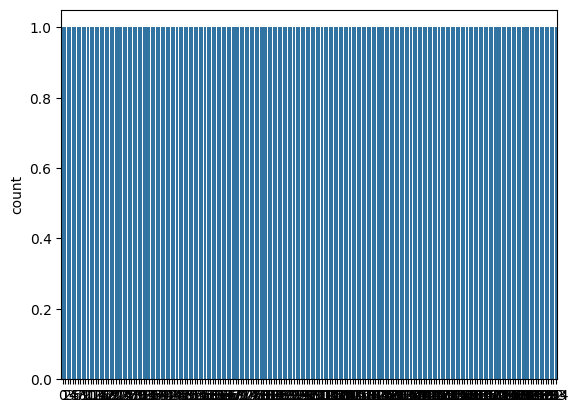

In [17]:
sns.countplot(park['status'])

<ipython-input-18-9349efe605b9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(park['status'])


<Axes: xlabel='status', ylabel='Density'>

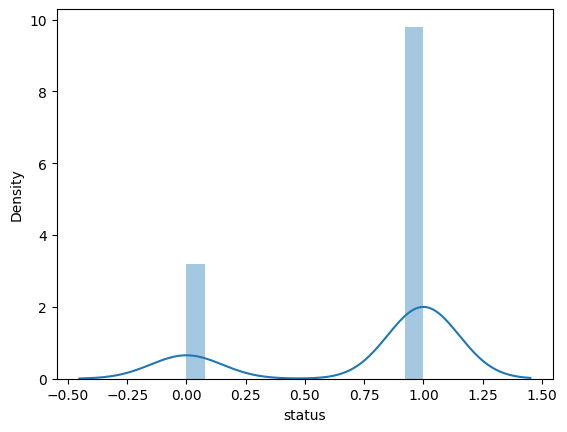

In [18]:
sns.distplot(park['status'])

<Axes: xlabel='status', ylabel='Count'>

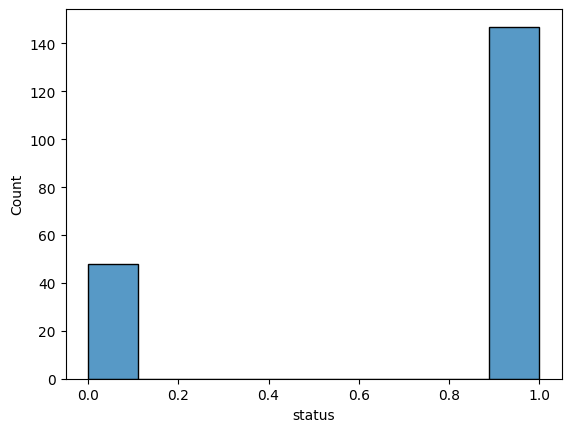

In [19]:
sns.histplot(park['status'])

<Axes: ylabel='status'>

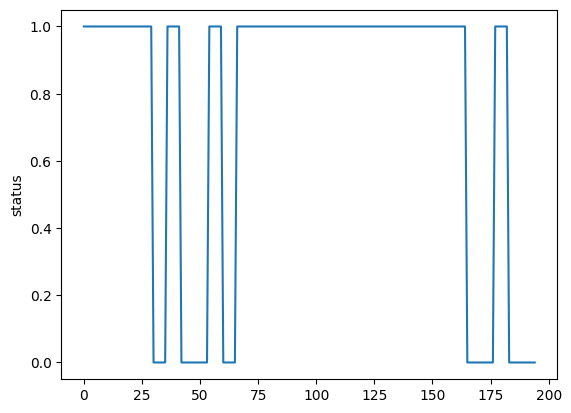

In [25]:
sns.lineplot(park['status'])

<Axes: ylabel='status'>

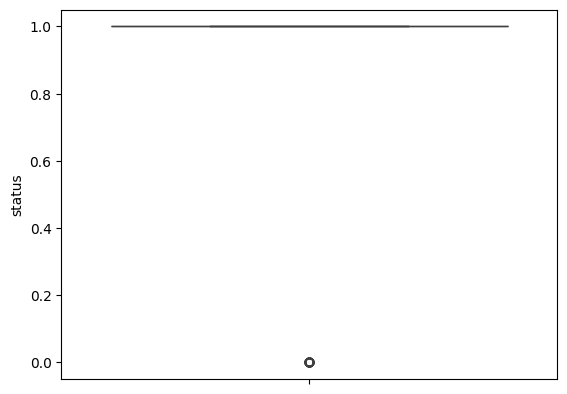

In [27]:
sns.boxplot(park['status'])

<Axes: ylabel='status'>

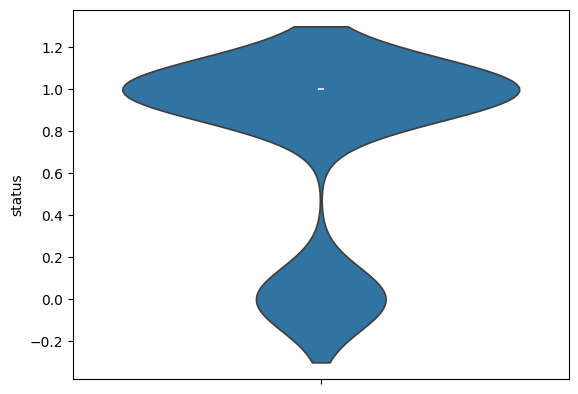

In [28]:
sns.violinplot(park['status'])

<Axes: ylabel='status'>

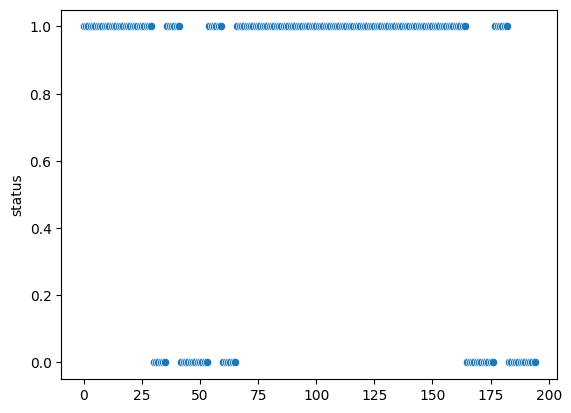

In [29]:
sns.scatterplot(park['status'])

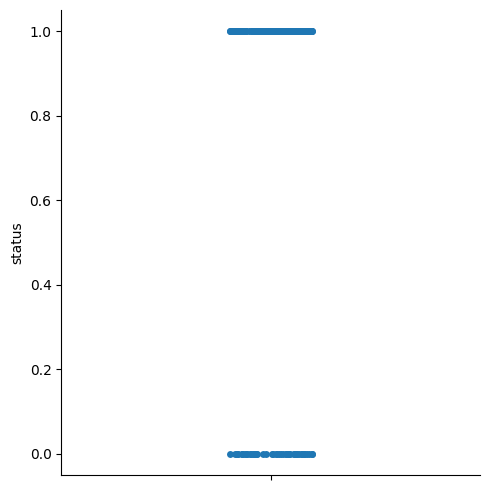

In [30]:
sns.catplot(park['status'])

1->parkinsions postive
0->healthy

correlation

In [34]:
corr=park.corr()

<ipython-input-34-8f8690982641>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=park.corr()


In [35]:
corr


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


<Axes: >

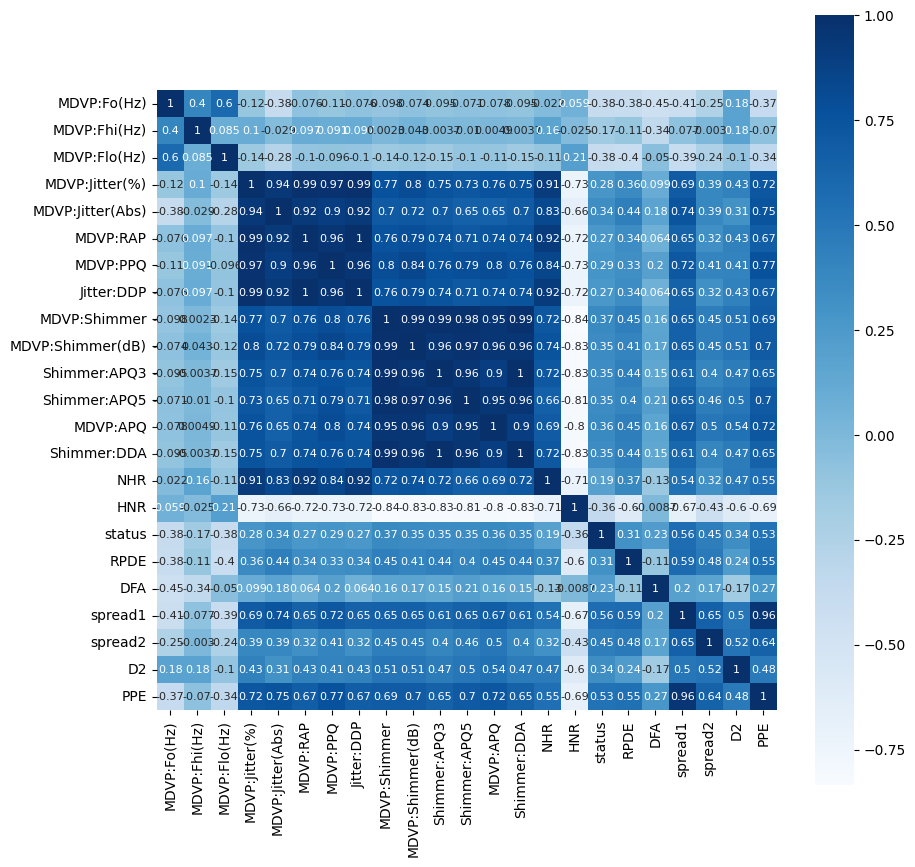

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues')

training and testing


In [39]:
X=park.drop(columns=['name','status'],axis=1)
Y=park['status']

In [40]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [41]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [48]:
X_train,Y_train,X_test,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [49]:
print(X_train)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
123      182.018       197.173        79.187         0.00842   
160      114.238       124.393        77.022         0.00581   
94       157.821       172.975        68.401         0.00358   
57       117.274       129.916       110.402         0.00752   
41       184.055       196.537       166.977         0.00258   
..           ...           ...           ...             ...   
43       241.404       248.834       232.483         0.00281   
22       167.930       193.221        79.068         0.00442   
72       120.080       139.710       111.208         0.00405   
15       142.167       217.455        83.159         0.00369   
168      197.569       217.627        90.794         0.00803   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
123           0.00005   0.00506   0.00449     0.01517       0.02503   
160           0.00005   0.00299   0.00316     0.00896       0.04009   
94            0.00

In [50]:
print(Y_train)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
10        88.333       112.240        84.072         0.00505   
79       100.770       115.697        85.545         0.01038   
164      102.273       142.830        85.902         0.00907   
142      198.458       219.290       148.691         0.00376   
186      116.556       592.030        86.228         0.00496   
133      118.747       123.723       109.836         0.00331   
35       201.464       210.565       195.708         0.00198   
137      113.166       130.270       100.673         0.00502   
25       104.400       206.002        77.968         0.00633   
2        116.682       131.111       111.555         0.01050   
12       136.926       159.866       131.276         0.00293   
128      119.031       127.533       109.216         0.00440   
144      202.544       241.350       164.168         0.00254   
3        116.676       137.871       111.366         0.00997   
48       122.188       128.611       115

In [52]:
print(Y_train.shape)

(39, 22)


In [53]:
sc=StandardScaler()


In [54]:
sc.fit(X_train)

StandardScaler()

transform convert the data into shape range

In [55]:
X_train=sc.transform(X_train)

In [56]:
X_train

array([[ 0.63239631, -0.02731081, -0.87985049, ..., -0.97586547,
        -0.55160318,  0.07769494],
       [-1.05512719, -0.83337041, -0.9284778 , ...,  0.3981808 ,
        -0.61014073,  0.39291782],
       [ 0.02996187, -0.29531068, -1.12211107, ..., -0.43937044,
        -0.62849605, -0.50948408],
       ...,
       [-0.9096785 , -0.6637302 , -0.160638  , ...,  1.22001022,
        -0.47404629, -0.2159482 ],
       [-0.35977689,  0.19731822, -0.79063679, ..., -0.17896029,
        -0.47272835,  0.28181221],
       [ 1.01957066,  0.19922317, -0.61914972, ..., -0.716232  ,
         1.23632066, -0.05829386]])

model selection

In [60]:
from sklearn import svm

In [61]:


classifier=svm.SVC(kernel='linear')

In [65]:
model=svm.SVC(kernel='linear')

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
mod=LogisticRegression()